**Mercari price suggestion challenge code.**

5 februari 2018, voor leren & beslissen, door:

- Nathan de Bruijn
- Roel Kuiper
- Tim Ottens
- Bram Otten

In [1]:
### IMPORT DEFINITELY USED PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Other packages are imported as necessary.

In [2]:
### SET DATA PREP VARIABLES

TESTING = True
N_ROWS = 150000
MIN_LIM = 15 ## for minimum nr of occurences.
MAX_LIM = 3000 ## to let this many most popular stay in.

In [3]:
### LOAD DATA

in_f = "../input/"
if TESTING:
    train = pd.read_csv(f"{in_f}train.tsv", sep='\t', nrows=N_ROWS)
    test = pd.read_csv(f"{in_f}train.tsv", sep='\t', nrows=1000)
else:
    train = pd.read_csv(f"{in_f}train.tsv", sep='\t')
    test = pd.read_csv(f"{in_f}test.tsv", sep='\t')
train = train.sample(frac=1)
test = test.sample(frac=1)
n_training_rows = len(train)
n_test_rows = len(test)
n_rows = n_training_rows + n_test_rows
data_set = pd.concat([train[:n_training_rows], test])

if TESTING:
    print("Any NULL values?")
    print(data_set.isnull().any())
    data_set.head(3)

Any NULL values?
train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description     False
dtype: bool


In [4]:
### PREPARE ITEM_DESCRIPTION

place_holder = "Missing!"
data_set['item_description'].fillna(value=place_holder, inplace=True)
if TESTING:
    print(data_set["item_description"].value_counts()[:10])
## The most common description is
def_description = "No description yet"
## Which says nothing about the item. So it should be ignored later,
## therefore fill with None instead of place_holder
data_set["item_description"].replace(def_description, 
                                     None, inplace=True)
if TESTING:
    print(data_set["item_description"].value_counts()[:10])

## Now want to tokenize and treat rare words as more influential.
## The min_df argument limits vocabulary size to skip over 
## words too rare to be useful in training. Takes some larger ngram's
## too to catch stuff like "Galaxy 6S".
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=MIN_LIM,
                     ngram_range=(1, 3),
                     stop_words='english')
X_description = tv.fit_transform(data_set['item_description'])

if TESTING:
    print(tv.vocabulary_)
    print(X_description[:50])

No description yet     8517
New                     417
Brand new               310
Great condition         128
Good condition          125
Like new                 98
Never worn               91
NWT                      80
New with tags            69
Excellent condition      62
Name: item_description, dtype: int64
New                    436
Brand new              328
Good condition         132
Great condition        131
Like new               105
Never worn             103
NWT                     88
New with tags           72
Excellent condition     67
Never used              63
Name: item_description, dtype: int64
{'great': 12670, 'quality': 23632, 'says': 25541, 'size': 27290, '16': 469, 'sure': 29656, 'kids': 15473, 'adults': 1752, 'china': 6014, 'sizing': 27914, 'fit': 10963, 'xsmall': 33784, 'small': 28171, 'older': 20520, 'petite': 21734, 'women': 33162, 'great quality': 12824, 'says size': 25548, 'size 16': 27333, 'kids adults': 15474, 'xsmall small': 33785, 'small fit': 28213,

In [5]:
### PREPARE NAME

## Repeat the above.
tv = TfidfVectorizer(min_df=MIN_LIM,
                     ngram_range=(1, 3),
                     stop_words='english')
X_name = tv.fit_transform(data_set['name'])
if TESTING:
    print(tv.vocabulary_)
    print(X_name[:10])

{'freeship': 2463, 'chinese': 1402, 'costume': 1628, 'dress': 1976, 'pink': 4920, 'victoria': 6927, 'secret': 5712, 'lot': 3691, '36c': 135, 'victoria secret': 6928, 'nes': 4311, 'classic': 1443, 'edition': 2110, 'nes classic': 4312, 'lego': 3514, '13': 35, 'series': 5797, '16': 46, '17': 50, 'hollister': 2903, 'jeans': 3133, 'hollister jeans': 2908, 'bundle': 1142, 'ninja': 4482, 'turtles': 6802, 'nintendo': 4485, 'ninja turtles': 4484, 'tiffany': 6635, 'pendant': 4839, 'hudson': 2965, 'flare': 2351, 'flare jeans': 2352, 'ring': 5497, 'wide': 7201, 'calf': 1214, 'suede': 6380, 'boots': 960, 'knee': 3311, 'suede boots': 6382, 'vera': 6910, 'bradley': 1041, 'ruffle': 5573, 'emerald': 2137, 'cosmetic': 1619, 'bag': 563, 'vera bradley': 6911, 'cosmetic bag': 1620, '925': 239, 'silver': 5955, 'plated': 5078, 'chain': 1335, 'necklace': 4297, '925 silver': 240, 'silver plated': 5962, 'lg': 3534, 'adidas': 279, 'red': 5419, 'shorts': 5919, 'engagement': 2144, 'boxes': 997, 'women': 7250, 'tre

In [6]:
### FILL MISSING VALUES FROM DESCRIPTION AND NAME.

## Fill in some brands.
def most_pop_brands(data):
    return data.brand_name.value_counts()[1:100]

def get_brand_missing_rows(data):
    temp = pd.concat((data.brand_name.fillna(value='unknown'), 
                      data.item_description),axis=1)
    temp = temp.groupby(['brand_name'])
    return temp.get_group('unknown')

def getNewBrandIndex(brand, series):
    m = series[series.item_description.str.contains(brand)==True]
    return m.index

def important_brands():
    count = 0
    result = []
    not_important = ["pink","so","all"]
    brands = train.brand_name.value_counts().index[2:]
    for b in brands:
        try:
            count += 1
            result.append([b,no_brand_rows.item_description.\
                             str.contains(" "+b+" ").\
                             value_counts(False)[1]])
        except:
            pass
    return result

def replace_unknowns():
    for brand in pop_brand_list.index:
        x = no_brand_rows[no_brand_rows.\
                          item_description.str.\
                          contains(brand)].index
        y = test_no_brand_rows[test_no_brand_rows.\
                               item_description.str.\
                               contains(brand)].index
        train.loc[x,'brand_name'] = brand
        test.loc[y,'brand_name'] = brand
        
## Has no positive effect and is pretty slow.
FILL_BRANDS = False
if TESTING and FILL_BRANDS:
    pop_brand_list = most_pop_brands(train)
    no_brand_rows = get_brand_missing_rows(train)
    test_no_brand_rows = get_brand_missing_rows(test)
    imp_list = important_brands()
    imp_list.sort(key=lambda x: x[1], reverse=True)
    replace_unknowns()

In [7]:
### PREPARE BRAND_NAME

## Remove rare values. Binarizer used later doesn't have a min_df,
## so only keep X most popular. But not place_holder of course.
data_set['brand_name'].fillna(value=place_holder, inplace=True)
brands_to_keep = data_set['brand_name'].value_counts()\
    .loc[lambda x: x.index != place_holder].index[:MAX_LIM]
data_set.loc[~data_set['brand_name'].isin(brands_to_keep), 
             'brand_name'] = place_holder

## Tokenize.
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(data_set['brand_name'])
if TESTING:
    print(X_brand[:10])

  (0, 1435)	1
  (1, 2266)	1
  (2, 1543)	1
  (3, 1191)	1
  (4, 951)	1
  (5, 1435)	1
  (6, 1543)	1
  (7, 2154)	1
  (8, 969)	1
  (9, 1617)	1


In [8]:
### PREPARE CATEGORY_NAME

## Split into sub-categories.
def split_cat(text):
    result = str(text).split("/")
    if len(result) != 3:
        return (place_holder, place_holder, place_holder)
    return result
        
data_set['item_description'].fillna(value=place_holder, inplace=True)
data_set['cat1'], data_set['cat2'], data_set['cat3'] = \
    zip(*data_set['category_name'].apply(lambda x: split_cat(x)))
    
## Now don't remove place_holder and "other" like categories 
## necessarily. Model should assign low weight but could 
## be useful information.

## Tokenize.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cat1 = cv.fit_transform(data_set['cat1'])
X_cat2 = cv.fit_transform(data_set['cat2'])
X_cat3 = cv.fit_transform(data_set['cat3'])
if TESTING:
    print(cv.vocabulary_)
    print(X_cat3[:10])

{'costume': 196, 'bras': 100, 'video': 798, 'game': 308, 'action': 7, 'figures': 279, 'statues': 682, 'slim': 655, 'skinny': 648, 'necklaces': 467, 'games': 309, 'flare': 287, 'rings': 599, 'boots': 84, 'cosmetic': 195, 'bags': 36, 'other': 488, 'shorts': 641, 'vest': 795, 'dogs': 230, 'one': 481, 'pieces': 530, 'lips': 415, 'jackets': 374, 'shirts': 637, 'fashion': 271, 'sneakers': 661, 'crewneck': 205, 'purse': 575, 'arts': 25, 'crafts': 203, 'children': 155, 'books': 81, 'tunic': 779, 'cardigan': 134, 'two': 783, 'piece': 529, 'sweater': 711, 'socks': 667, 'dolls': 233, 'accessories': 5, 'blouse': 73, 'wallets': 807, 'charm': 153, 'hooded': 354, 'shoes': 638, 'cd': 146, 'pants': 503, 'tights': 747, 'leggings': 404, 'bottle': 85, 'feeding': 273, 'health': 338, 'care': 136, 'sports': 674, 'above': 3, 'knee': 389, 'mini': 444, 'collectibles': 178, 'pendant': 516, 'face': 267, 'animation': 18, 'stuffed': 697, 'animals': 17, 'plush': 547, 'tops': 757, 'fleece': 291, 'jacket': 373, 'home'

count    151000.000000
mean         26.656219
std          37.793720
min           0.000000
25%          10.000000
50%          17.000000
75%          29.000000
max        1759.000000
Name: price, dtype: float64


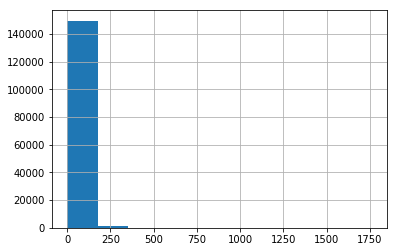

AxesSubplot(0.125,0.125;0.775x0.755)


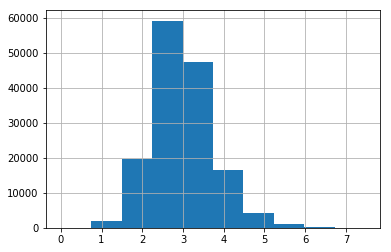

In [9]:
### PREPARE PRICE

## Handle the skewedness and 0 values with log(1 + price).
y = np.log1p(train["price"])
if TESTING:
    print(data_set["price"].describe())
    plt.show(data_set["price"].hist())
    print(y.hist())

In [10]:
### PREPARE ITEM_CONDITION_ID AND SHIPPING

## Condition ID is categorical, not continous like a model may assume.
if TESTING:
    print(data_set["shipping"][:10])
    print(data_set["item_condition_id"][:10])
from scipy.sparse import csr_matrix
X_cond = csr_matrix(pd.get_dummies(data_set['item_condition_id'],
                    sparse=True).values)
X_ship = csr_matrix(pd.get_dummies(data_set['shipping'],
                    sparse=True).values)
if TESTING:
    print(X_cond[:10])
    print(X_ship[:10])

75610     1
126963    1
134178    0
15150     1
17118     0
2271      1
94290     1
87989     1
16075     0
25037     1
Name: shipping, dtype: int64
75610     2
126963    3
134178    1
15150     2
17118     3
2271      1
94290     3
87989     3
16075     2
25037     2
Name: item_condition_id, dtype: int64
  (0, 1)	1
  (1, 2)	1
  (2, 0)	1
  (3, 1)	1
  (4, 2)	1
  (5, 0)	1
  (6, 2)	1
  (7, 2)	1
  (8, 1)	1
  (9, 1)	1
  (0, 1)	1
  (1, 1)	1
  (2, 0)	1
  (3, 1)	1
  (4, 0)	1
  (5, 1)	1
  (6, 1)	1
  (7, 1)	1
  (8, 0)	1
  (9, 1)	1


In [11]:
### CREATE INPUT DATA

## Create an input matrix.
from scipy.sparse import hstack
the_matrix = hstack((X_name, 
                     X_brand,
                     X_description,
                     X_cat1,
                     X_cat2,
                     X_cat3,
                     X_cond,
                     X_ship)).tocsr()
train_matrix = the_matrix[:n_training_rows]
test_matrix = the_matrix[n_training_rows:]
if TESTING:
    print(train_matrix.shape)
    print(train_matrix)

(150000, 44854)
  (0, 1402)	0.6475271548347812
  (0, 1628)	0.46528288323973344
  (0, 1976)	0.3075444385329572
  (0, 2463)	0.4499806557299094
  (0, 4920)	0.2591413709001764
  (0, 8867)	1.0
  (0, 10330)	0.163318874243629
  (0, 11613)	0.24548676000668435
  (0, 15875)	0.21265316598420253
  (0, 20824)	0.24637850956610566
  (0, 22531)	0.09670221472723078
  (0, 22685)	0.21565613152002233
  (0, 25334)	0.3417120174569438
  (0, 25335)	0.2868987022010211
  (0, 30381)	0.23237451516829108
  (0, 31595)	0.23087433822537756
  (0, 33493)	0.1427327408326677
  (0, 35402)	0.17729356693663986
  (0, 35409)	0.22742776228718423
  (0, 37151)	0.0668095043081968
  (0, 37194)	0.2291006329529863
  (0, 37775)	0.20930683569836903
  (0, 38032)	0.1054220862852062
  (0, 38074)	0.22236086069033284
  (0, 39517)	0.1581463564593414
  :	:
  (149998, 8773)	1.0
  (149998, 27473)	0.483712595877238
  (149998, 32344)	0.28079723696399034
  (149998, 32362)	0.46701475707729284
  (149998, 37853)	0.31429783145638757
  (149998, 37855)

In [12]:
### PARAMETERS OF MODELS

sgd_iters = 420
val_split = 0.12
gbm_verbo = 500
if TESTING:
    gbm_verbo /= 10

gbm_rounds = 6000
gbm_stop = 500
gbm_params = {
    'verbosity': -1,
    'learning_rate': 0.6,
    'application': 'regression',
    'max_depth': 4,
    'num_leaves': 60,
    'metric': 'RMSE',
    'bagging_fraction': 0.6,
    'nthread': 4
}

In [13]:
### FIT REGRESSION

from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(max_iter=sgd_iters,
                         penalty='elasticnet',
                         l1_ratio=0,
                         random_state=42)

if TESTING:
    from sklearn.model_selection import cross_validate
    sgd_cv = cross_validate(sgd_model, train_matrix, y=y,
                            return_train_score=True,
                            scoring='neg_mean_squared_error',
                            n_jobs=1)

    rmse_sgd = (sgd_cv['test_score'] * -1) ** 0.5
    print(rmse_sgd)
else:
    sgd_model.fit(train_matrix, y)

[0.5115827  0.51296891 0.50868802]


In [14]:
### FIT GBM

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(train_matrix, y,
                     test_size=val_split, random_state=84)

## Train and run the model.
import lightgbm as lgb
gbm_train_data = lgb.Dataset(X_train, label=y_train)
gbm_valid_data = lgb.Dataset(X_valid, label=y_valid)
gbm_model = lgb.train(gbm_params, train_set=gbm_train_data, 
                      num_boost_round=gbm_rounds,
                      valid_sets=[gbm_train_data, gbm_valid_data], 
                      early_stopping_rounds=gbm_stop,
                      verbose_eval=gbm_verbo)

Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[1026]	training's rmse: 0.431851	valid_1's rmse: 0.511431


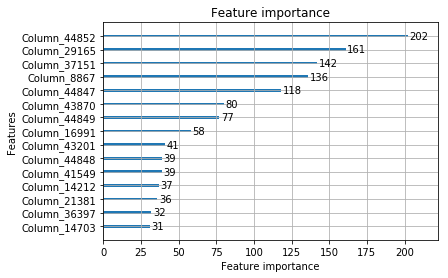

In [15]:
### MORE EVALUATION

def get_t_p(first, second):
    from scipy.stats import ttest_ind
    t_res = ttest_ind(first, second)
    return t_res[1]

if TESTING:
    ## Most important features.
    plt.show(lgb.plot_importance(gbm_model, max_num_features=15))
    ## It is possible to figure out what those really are,
    ## look in the corresponding X_...

In [16]:
### GET PREDICTIONS

if TESTING == False:
    sgd_preds = np.expm1(sgd_model.predict(X=test_matrix))
    gbm_preds = np.expm1(gbm_model.predict(test_matrix))
    blended_preds = sgd_preds * 0.4 + gbm_preds * 0.6

    submission: pd.DataFrame = test[['test_id']]
    submission['price'] = blended_preds
    submission.to_csv("kachelIX.csv", index=False)